In [23]:
import cv2
import numpy as np
import os, sys

# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

from modules.rectification import augmentation
from modules.inference import preprocessing, object_detection, nms

import matplotlib.pyplot as plt

In [2]:
#load both models
yolo_model1 = object_detection.Model()
yolo_model2 = object_detection.Model('../storage/models/yolo_model_2/yolov4-tiny-logistics_size_416_2.weights', 
                               '../storage/models/yolo_model_2/yolov4-tiny-logistics_size_416_2.cfg',
                               '../storage/models/yolo_model_2/logistics.names')

In [20]:
#functions predict from model
def yolo_predict(model, image, score_threshold = 0.5, nms_iou_threshold = 0.5):

    #predict from model
    predicted_outputs = model.predict(image)
    bounding_boxes, class_categories, scores = model.post_process(predicted_outputs, score_threshold = score_threshold)
       
    #nms
    indices = nms.filter(bounding_boxes, scores, score_threshold=0.0, nms_iou_threshold=nms_iou_threshold)

    filtered_boxes = [bounding_boxes[x] for x in indices]
    filtered_scores = [scores[x] for x in indices]
    filtered_categories = [class_categories[x] for x in indices]    


    return filtered_boxes, filtered_categories, filtered_scores

#get image and bounding boxes
def load_image(image_dir):

    #bounding box dir
    bbox_dir = image_dir.replace('.jpg', '.txt')

    #laod image
    image = cv2.imread(image_dir)

    image_processed = cv2.dnn.blobFromImage(image,
                            scalefactor = 1/255.,
                            size = (416, 416),
                            mean = (0, 0, 0),
                            swapRB = True,
                            crop = False
        )

    return image_processed

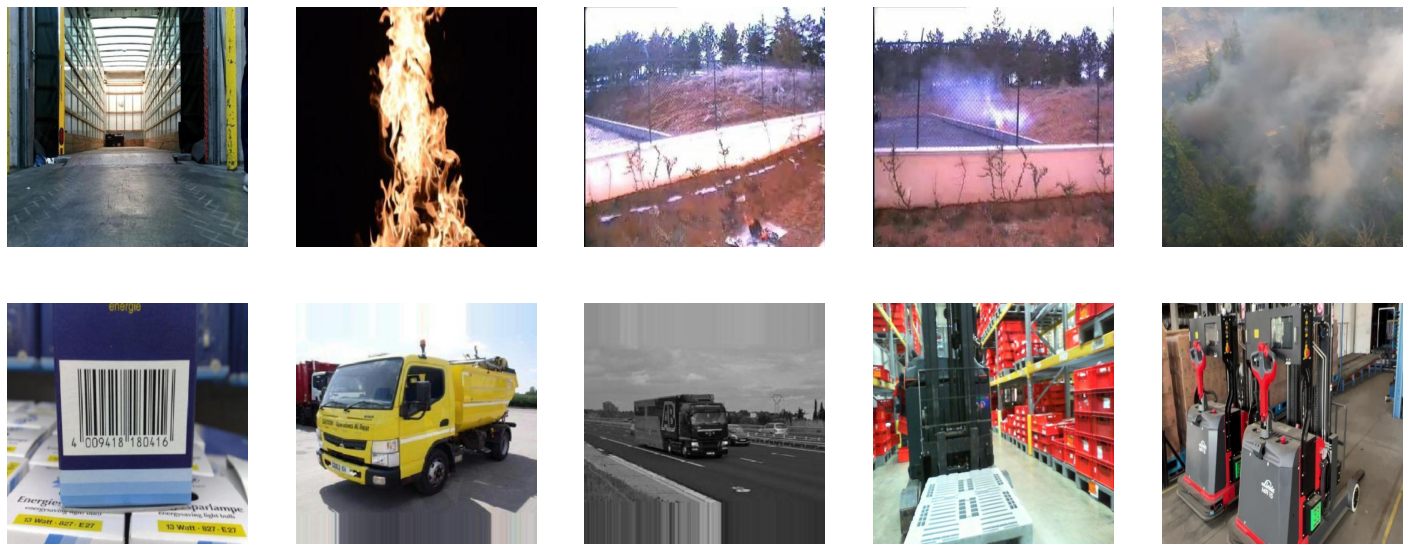

In [40]:
#select 10 random images and plot them.
data_dir = '../storage/data/dataset'
data_paths = os.listdir(data_dir)
image_paths = [os.path.join(data_dir, x) for x in data_paths if x.endswith('.jpg')]

#10 random images
import random
random.seed(42)
sample_image_paths = [random.choice(image_paths) for _ in range(10)]

#load images
sample_images = [load_image(image_path) for image_path in sample_image_paths]

#plot them
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(2):
    for j in range(5):
        index = i * 5 + j 
        if index < len(sample_images): 

            ax[i, j].imshow(np.transpose(sample_images[index][0], (1, 2, 0)))
            ax[i, j].axis('off') 

plt.show()


### Horizontal Flip ###

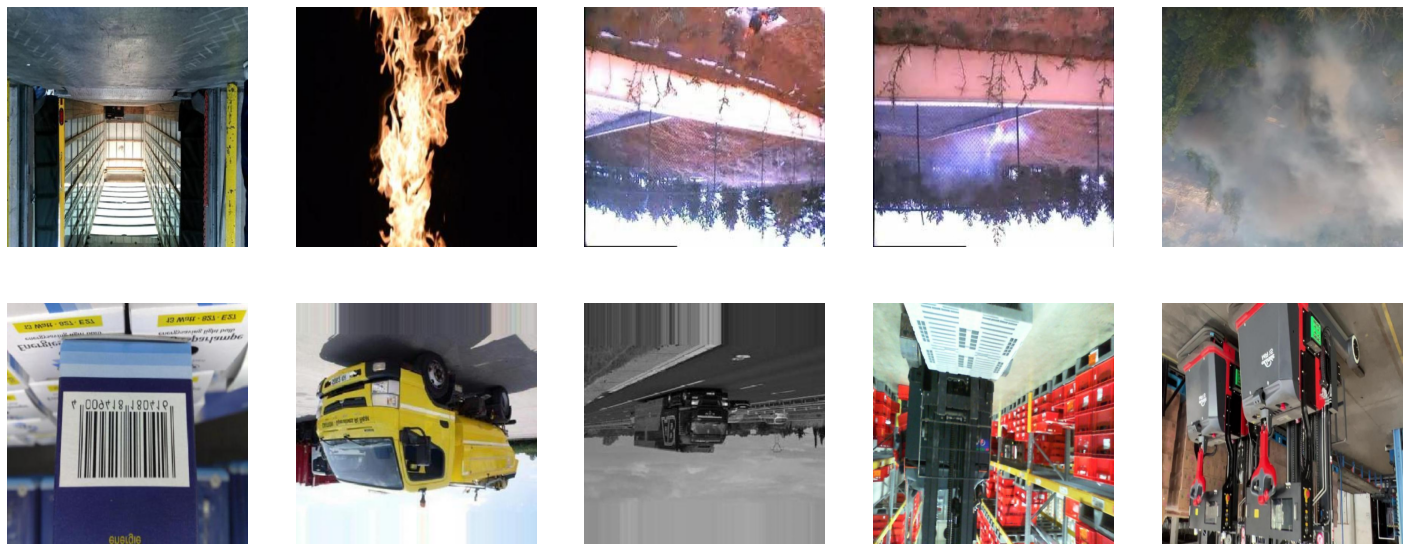

In [57]:
## augment images
flipped_images = [augmentation.horizontal_flip(image[0]) for image in sample_images]

#plot them
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(2):
    for j in range(5):
        index = i * 5 + j 
        if index < len(flipped_images): 

            ax[i, j].imshow(np.transpose(flipped_images[index], (1, 2, 0)))
            ax[i, j].axis('off') 

plt.show()


(3, 416, 416)

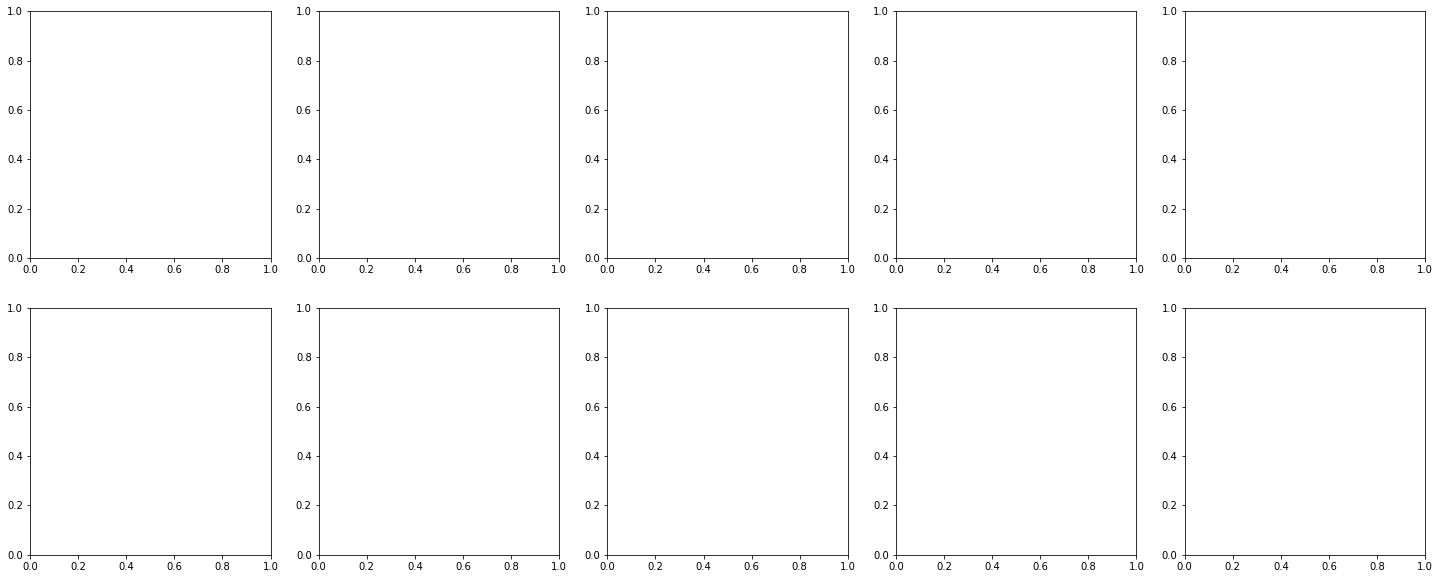

In [60]:
#predict using yolo model 2
#plot them
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

# for i in range(2):
#     for j in range(5):
#         index = i * 5 + j 
#         if index < len(flipped_images): 
#             boxes, ids, scores = yolo_predict(yolo_model2, flipped_images[index], 0.25, 0.25)
#             class_labels = [yolo_model2.classes[i] for i in ids]
#             #transpose image
#             image_trans = np.transpose(flipped_images[index][0], (1, 2, 0))
#             image_boxed = object_detection.draw_multiple_boxes(image_trans, boxes, scores, ids, class_labels)
#             ax[i, j].imshow(image_boxed)
#             ax[i, j].axis('off') 

# plt.show()

flipped_images[0].shape


### Gaussian Blur ###

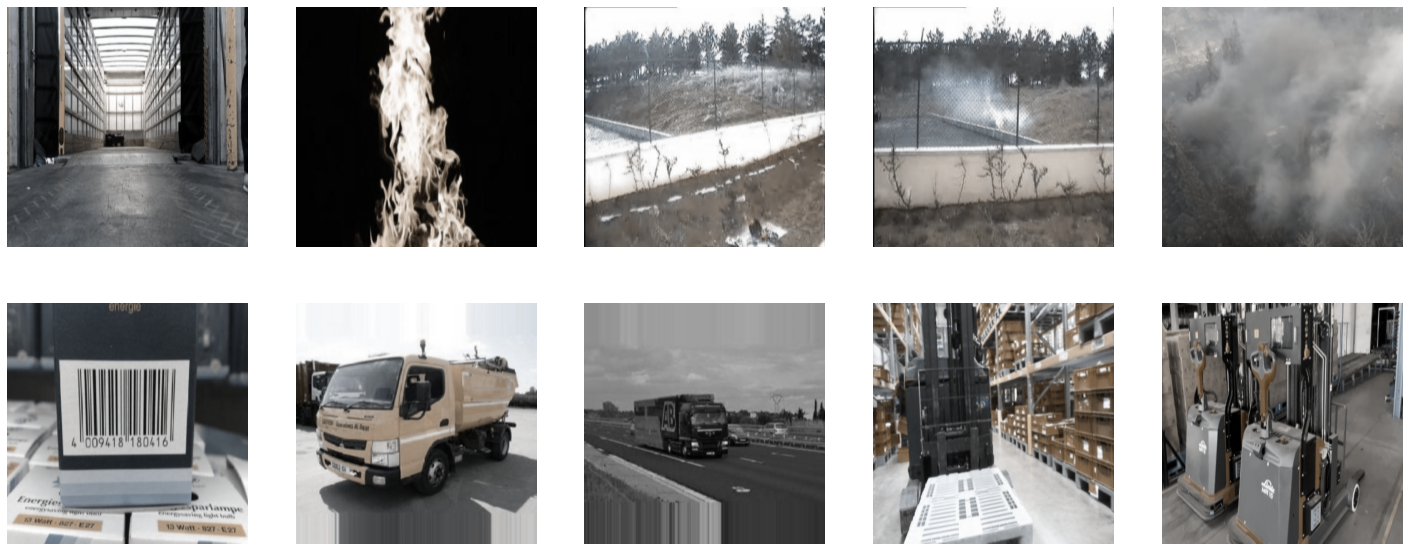

In [56]:
## augment images
blurred_images = [augmentation.gaussian_blur(image[0]) for image in sample_images]

#plot them
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(2):
    for j in range(5):
        index = i * 5 + j 
        if index < len(flipped_images): 

            ax[i, j].imshow(np.transpose(blurred_images[index], (1, 2, 0)))
            ax[i, j].axis('off') 

plt.show()


In [ ]:
#predict using yolo model 2
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(2):
    for j in range(5):
        index = i * 5 + j 
        if index < len(sample_images): 
            boxes, ids, scores = yolo_predict(yolo_model2, sample_images[index], 0.25, 0.25)
            class_labels = [yolo_model2.classes[i] for i in ids]
            #transpose image
            image_trans = np.transpose(sample_images[index][0], (1, 2, 0))
            image_boxed = object_detection.draw_multiple_boxes(image_trans, boxes, scores, ids, class_labels)
            ax[i, j].imshow(image_boxed)
            ax[i, j].axis('off') 

plt.show()
